In [5]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import json

In [16]:
base_path = "/home/yuga/.config/unity3d/DefaultCompany/PerceptionURP/tests/ZED_720p/"
path = base_path + "train_moon.json"

In [17]:
with open(path) as f:
    fj = json.load(f)

old_image_id = 0
polys = []
for annotation_id in range (len(fj["annotations"])):
    current_image_id = fj["annotations"][annotation_id]["image_id"]
    poly = []
    tmp = 0
    # forで回す数をsegmentationの長さの1/2にする
    range_num = int(len(fj["annotations"][annotation_id]["segmentation"][0]) / 2)

    for j in range(range_num):
        xy = (fj["annotations"][annotation_id]["segmentation"][0][tmp], fj["annotations"][annotation_id]["segmentation"][0][tmp+1])
        poly.append(xy)
        tmp += 2
#     print(len(poly))
    
#     if len(poly) > 4:
    polys.append(poly)

    if old_image_id != current_image_id:
        old_image_id = current_image_id
#         print("image_number", old_image_id)
        print(fj["images"][0]["file_name"])
        print("change image")
        del polys[-1]
        annotation_id -= 1
        break
    
# print(polys)

[(956.0, 206.0)]
[(956.0, 206.0), (978.0, 205.0)]
[(956.0, 206.0), (978.0, 205.0), (991.0, 199.0)]
[(956.0, 206.0), (978.0, 205.0), (991.0, 199.0), (959.0, 196.0)]
[(956.0, 206.0), (978.0, 205.0), (991.0, 199.0), (959.0, 196.0), (916.0, 196.0)]
[(956.0, 206.0), (978.0, 205.0), (991.0, 199.0), (959.0, 196.0), (916.0, 196.0), (888.0, 197.0)]
[(956.0, 206.0), (978.0, 205.0), (991.0, 199.0), (959.0, 196.0), (916.0, 196.0), (888.0, 197.0), (883.0, 200.0)]
[(956.0, 206.0), (978.0, 205.0), (991.0, 199.0), (959.0, 196.0), (916.0, 196.0), (888.0, 197.0), (883.0, 200.0), (889.0, 202.0)]
[(956.0, 206.0), (978.0, 205.0), (991.0, 199.0), (959.0, 196.0), (916.0, 196.0), (888.0, 197.0), (883.0, 200.0), (889.0, 202.0), (956.0, 206.0)]
[(1123.0, 276.0)]
[(1123.0, 276.0), (1123.0, 274.0)]
[(1123.0, 276.0), (1123.0, 274.0), (1092.0, 270.0)]
[(1123.0, 276.0), (1123.0, 274.0), (1092.0, 270.0), (1068.0, 271.0)]
[(1123.0, 276.0), (1123.0, 274.0), (1092.0, 270.0), (1068.0, 271.0), (1123.0, 276.0)]
[(950.0, 29

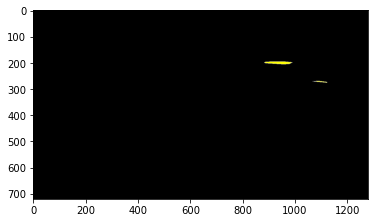

In [18]:
im = Image.new('RGB', (1280, 720), (0, 0, 0))
draw = ImageDraw.Draw(im)
for i in range(len(polys)):
    draw.polygon(polys[i], fill=(255, 255, 0), outline=(255, 255, 255))
plt.imshow(im)
plt.show()
im.save("test.png")

In [ ]:
# Figureを作成
fig = plt.figure(figsize=(550, 550))

# FigureにAxes(サブプロット)を追加
ax = fig.add_subplot(111)

# 4つの頂点を指定してひし形を描画
# 塗り潰しはライム、縁の色はブラック
# p = pat.Polygon(xy = [(0.2, 0.5), (0.5, 0.1), (0.8, 0.5), (0.5, 0.9)],
# fc = "lime", ec = "black")

p = pat.Polygon(xy = poly,
fc = "lime", ec = "black")

# Axesに多角形を追加
ax.add_patch(p)